# Imports

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image
from matplotlib.pyplot import imshow, imsave
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import datetime
import os, sys
import time
import pandas as pd

from matplotlib.pyplot import imshow, imsave
from plotly.subplots import make_subplots
import plotly.express as px
%matplotlib inline
import shutil

from google.colab import drive
import os

gdrive_path='/content/gdrive/MyDrive/GANs/collect_into_one_architecture'

drive.mount('/content/gdrive', force_remount=False)
os.chdir(gdrive_path)
print(sorted(os.listdir()))


DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Mounted at /content/gdrive
['Changing_batchnorm_False.ipynb', 'Changing_batchnorm_True.ipynb', 'Changing_betas.ipynb', 'Changing_clip_values.ipynb', 'Changing_disc_iter.ipynb', 'Changing_gradient_penalty.ipynb', 'Changing_learning_rates.ipynb', 'Result-Plots.ipynb', '__pycache__', 'data', 'files', 'functions.py', 'functions_for_batchnorm.py', 'generated_images', 'real_images', 'results']


In [2]:
from functions_for_batchnorm import *

In [3]:
values = pd.read_csv("files/values_of_some_hyperparams.csv")
values

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,model_name,n_noise,batch_size,n_critic,max_epochs,clip_value,best_lr,best_beta,penalty
0,0,0,0,0,0,WGAN,100,128,1,35,0.01,0.001,0.9,NaN
1,1,1,1,1,1,WGAN_GP,100,128,2,33,NaN,0.001,0.9,10.0
2,2,2,2,2,2,LSGAN,100,128,1,20,NaN,0.001,0.9,NaN
3,3,3,3,3,3,Vanilla_GAN,100,128,2,20,NaN,0.001,0.9,NaN


In [4]:
def run(MODEL_NAME, lrs, batch_size, n_critic, max_epoch, clip_value, n_noise, threshold, beta, random_seed = False):
  
  time_to_finish = []
  root1 = f"results/models/batchnorm_False/{MODEL_NAME}/"
  root2 = f"results/imgs/batchnorm_False/{MODEL_NAME}/"
  start_time = time.time()
  path_model = root1 + "batchnorm_False"
  path_img = root2 + "batchnorm_False"

  if os.path.exists(path_img):
    shutil.rmtree(path_img)
    print(f"Removed {path_img}")
    os.mkdir(path_img)
  else:
    os.mkdir(path_img)
  
  if os.path.exists(path_model):
    shutil.rmtree(path_model)
    print(f"Removed {path_model}")
    os.mkdir(path_model)

  else:
    os.mkdir(path_model)
  print(path_model)
  print(path_img)
  print("*"*30)
  print("\n Batchnorm False!")
  if MODEL_NAME == "Vanilla_GAN":
    train_Vanilla_GAN(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
              learning_rate = lrs, batch_size = batch_size, n_critic = n_critic,  max_epoch = max_epoch, n_noise = n_noise, random_seed = random_seed, 
              threshold = threshold, beta=beta)
  elif MODEL_NAME == "LSGAN":
    train_LSGAN(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
            learning_rate = lrs, batch_size = batch_size, n_critic = n_critic,  max_epoch = max_epoch, n_noise = n_noise, random_seed = random_seed,
            threshold = threshold, beta=beta)
  elif  MODEL_NAME == "WGAN":
    train_WGAN(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
            learning_rate = lrs, batch_size = batch_size, n_critic = n_critic,  max_epoch = max_epoch, clip_value = clip_value, n_noise = n_noise,
            random_seed = random_seed, threshold = threshold, beta=beta)
  elif MODEL_NAME == "WGAN_GP":
    train_WGAN_GP(model_name = MODEL_NAME, path_model = f"{path_model}", path_img = f"{path_img}",
            learning_rate = lrs, batch_size = batch_size, n_critic = n_critic,  max_epoch = max_epoch, n_noise = n_noise, random_seed = random_seed,
            threshold = threshold, beta=beta)
  end_time = time.time()
  
  print("*"*30)
  time_to_finish.append(end_time - start_time)
  print("RUN TIME: ", time_to_finish)

  result_time = pd.DataFrame()
  result_time["time"] = time_to_finish
  result_time["batchnorm_False"] = 1
  result_time["batchnorm_False"] = result_time["batchnorm_False"].astype('str')
  result_time.to_csv(f"results/models/batchnorm_False/{MODEL_NAME}_runing_times.csv")

# GANs Comparative Analysis

# Batchnorm Analysis

## Vanilla GAN 


In [5]:
MODEL_NAME = values[values.model_name=="Vanilla_GAN"].model_name.values[0]
n_noise = values[values.model_name=="Vanilla_GAN"].n_noise.values[0]
batch_size = int(values[values.model_name=="Vanilla_GAN"].batch_size.values[0])
n_critic = values[values.model_name=="Vanilla_GAN"].n_critic.values[0]
max_epoch = values[values.model_name=="Vanilla_GAN"].max_epochs.values[0]
clip_value = values[values.model_name=="Vanilla_GAN"].clip_value.values[0]
lr = values[values.model_name=="Vanilla_GAN"].best_lr.values[0]
beta = values[values.model_name=="Vanilla_GAN"].best_beta.values[0]


results/models/batchnorm_False/Vanilla_GAN/batchnorm_False
results/imgs/batchnorm_False/Vanilla_GAN/batchnorm_False
******************************

 Batchnorm False!
Starting the training Vanilla_GAN
Batch size = 128, learning rate = 0.001
Beta = 0.27502931836911926
N critic = 2, N epochs = 20, Random Seed = False, Threshold = 0.5
Step: 50, D Loss: 0.5394182205200195, G Loss: 1.613100290298462
Step: 100, D Loss: 0.21429479122161865, G Loss: 2.4238457679748535
Step: 150, D Loss: 0.6580632328987122, G Loss: 2.211231231689453
Step: 200, D Loss: 1.4822113513946533, G Loss: 0.729647159576416
Step: 250, D Loss: 1.41583251953125, G Loss: 1.3264341354370117
Step: 300, D Loss: 1.1356725692749023, G Loss: 0.739206075668335
Step: 350, D Loss: 1.0695011615753174, G Loss: 0.7317491769790649
Step: 400, D Loss: 1.1560826301574707, G Loss: 1.0876609086990356
Step: 450, D Loss: 1.319425106048584, G Loss: 0.7598416209220886
Epoch: 0/20, D Loss: 1.3617464303970337, G Loss: 1.893437385559082
Epoch 0: Prec

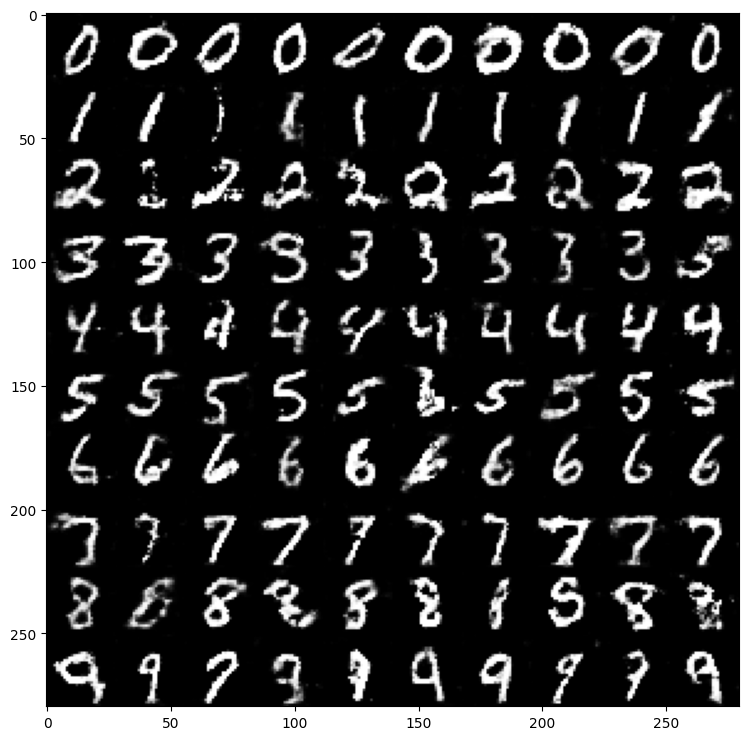

In [6]:
# run(
#   MODEL_NAME = MODEL_NAME,
#   lrs = lr,
#   batch_size = batch_size,
#   n_critic = n_critic,
#   max_epoch = max_epoch, 
#   clip_value = clip_value,
#   n_noise = n_noise,
#   threshold = 0.5,
#   beta = 0.27502931836911926)

In [7]:
print(f"{MODEL_NAME} batchnorm False")
plot_f1_precison_recall(f"results/models/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss(f"results/models/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss_step(f"results/models/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_G_D_loss_scores_per_step.csv")

Vanilla_GAN batchnorm False


Vanilla_GAN, batchnorm False


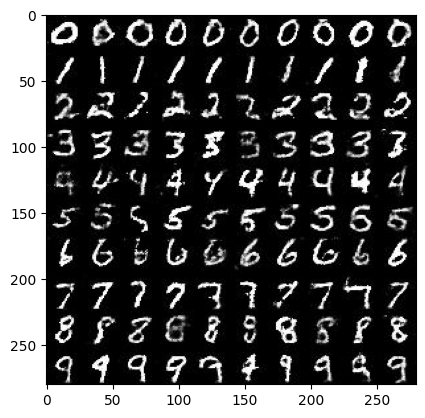

In [8]:
print(f"{MODEL_NAME}, batchnorm False")
path = f"results/imgs/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_last.jpg"
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

# LSGAN

In [9]:
MODEL_NAME = values[values.model_name=="LSGAN"].model_name.values[0]
n_noise = values[values.model_name=="LSGAN"].n_noise.values[0]
batch_size = int(values[values.model_name=="LSGAN"].batch_size.values[0])
n_critic = values[values.model_name=="LSGAN"].n_critic.values[0]
max_epoch = values[values.model_name=="LSGAN"].max_epochs.values[0]
clip_value = values[values.model_name=="LSGAN"].clip_value.values[0]
lr = values[values.model_name=="LSGAN"].best_lr.values[0]
beta = values[values.model_name=="LSGAN"].best_beta.values[0]


results/models/batchnorm_False/LSGAN/batchnorm_False
results/imgs/batchnorm_False/LSGAN/batchnorm_False
******************************

 Batchnorm False!
Starting the training LSGAN
Batch size = 128, learning rate = 0.001
Beta = 0.9
N critic = 1, N epochs = 20, Random Seed = False, Threshold = 0.5
Step: 50, D Loss: 0.008954184129834175, G Loss: 1.300702452659607
Step: 100, D Loss: 0.0001291194057557732, G Loss: 1.0320427417755127
Step: 150, D Loss: 0.006152322515845299, G Loss: 0.9114017486572266
Step: 200, D Loss: 0.0018176770536229014, G Loss: 0.8727846145629883
Step: 250, D Loss: 0.0013532316079363227, G Loss: 0.838240921497345
Step: 300, D Loss: 0.0009215710451826453, G Loss: 1.0624361038208008
Step: 350, D Loss: 0.007486192509531975, G Loss: 1.0896143913269043
Step: 400, D Loss: 0.007192108314484358, G Loss: 0.933635950088501
Step: 450, D Loss: 0.004167863167822361, G Loss: 0.891338586807251
Epoch: 0/20, D Loss: 0.00010172337351832539, G Loss: 1.00991690158844
Epoch 0: Precision =

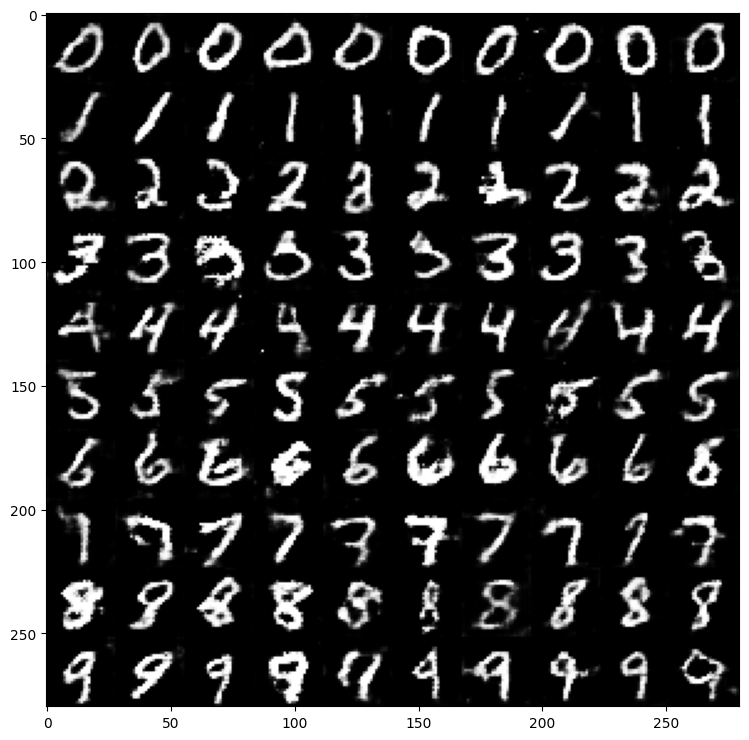

In [10]:
# run(
#   MODEL_NAME = MODEL_NAME,
#   lrs = lr,
#   batch_size = batch_size,
#   n_critic = n_critic,
#   max_epoch = max_epoch, 
#   clip_value = clip_value,
#   n_noise = n_noise,
#   threshold = 0.5,
#   # beta = 0.6394267984578837)
#   beta = beta)

In [11]:
print(f"{MODEL_NAME} batchnorm False")
plot_f1_precison_recall(f"results/models/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss(f"results/models/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss_step(f"results/models/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_G_D_loss_scores_per_step.csv")

LSGAN batchnorm False


LSGAN, batchnorm False


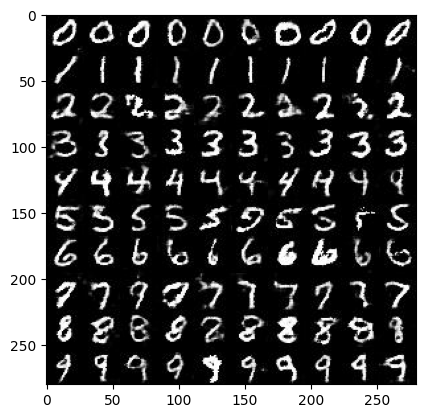

In [12]:
print(f"{MODEL_NAME}, batchnorm False")
path = f"results/imgs/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_last.jpg"
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

# WGAN GP

In [5]:
MODEL_NAME = values[values.model_name=="WGAN_GP"].model_name.values[0]
n_noise = values[values.model_name=="WGAN_GP"].n_noise.values[0]
batch_size = int(values[values.model_name=="WGAN_GP"].batch_size.values[0])
n_critic = values[values.model_name=="WGAN_GP"].n_critic.values[0]
max_epoch = values[values.model_name=="WGAN_GP"].max_epochs.values[0]
clip_value = values[values.model_name=="WGAN_GP"].clip_value.values[0]
lr = values[values.model_name=="WGAN_GP"].best_lr.values[0]
beta = values[values.model_name=="WGAN_GP"].best_beta.values[0]


Removed results/imgs/batchnorm_False/WGAN_GP/batchnorm_False
Removed results/models/batchnorm_False/WGAN_GP/batchnorm_False
results/models/batchnorm_False/WGAN_GP/batchnorm_False
results/imgs/batchnorm_False/WGAN_GP/batchnorm_False
******************************

 Batchnorm False!
Starting the training WGAN_GP
Batch size = 128, learning rate = 0.001
Beta = 0.7364712141640124
Gradient Penalty = 10
N critic = 2, N epochs = 33, Random Seed = False, Threshold = 0.5
Step: 50, D Loss: 3.335003137588501, G Loss: 1.0264604091644287
Step: 100, D Loss: -0.5256617069244385, G Loss: 2.5288429260253906
Step: 150, D Loss: -4.724525451660156, G Loss: 5.296412467956543
Step: 200, D Loss: 0.19641649723052979, G Loss: 2.574761152267456
Step: 250, D Loss: -2.1587226390838623, G Loss: 5.000448226928711
Step: 300, D Loss: -0.619383692741394, G Loss: 3.9212570190429688
Step: 350, D Loss: 0.4277978837490082, G Loss: 4.499520301818848
Step: 400, D Loss: -0.6067571043968201, G Loss: 5.635768890380859
Step: 450

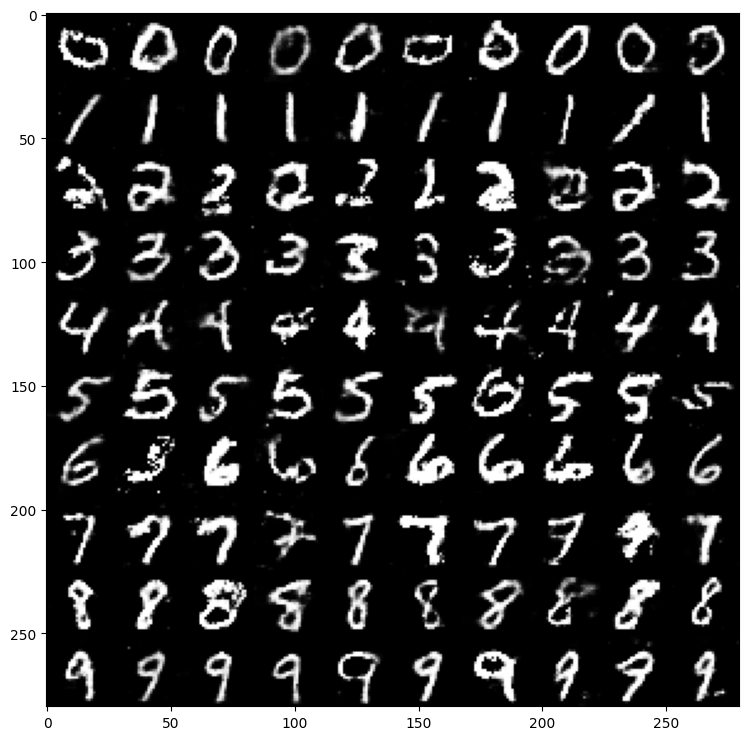

In [6]:
# run(
#   MODEL_NAME = MODEL_NAME,
#   lrs = lr,
#   batch_size = batch_size,
#   n_critic = n_critic,
#   max_epoch = max_epoch, 
#   clip_value = clip_value,
#   n_noise = n_noise,
#   threshold = 0.5,
#   beta = 0.7364712141640124
# )

In [7]:
print(f"{MODEL_NAME} batchnorm False")
plot_f1_precison_recall(f"results/models/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss(f"results/models/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss_step(f"results/models/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_G_D_loss_scores_per_step.csv")

WGAN_GP batchnorm False


WGAN_GP, batchnorm False


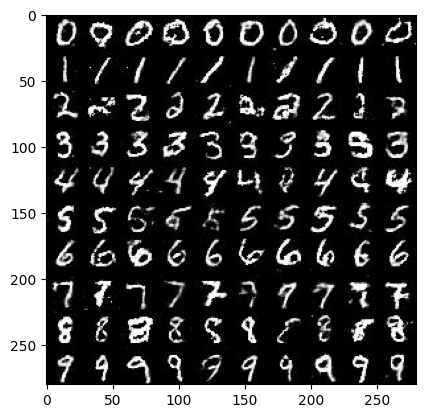

In [8]:
print(f"{MODEL_NAME}, batchnorm False")
path = f"results/imgs/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_last.jpg"
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

# WGAN

In [9]:
MODEL_NAME = values[values.model_name=="WGAN"].model_name.values[0]
n_noise = values[values.model_name=="WGAN"].n_noise.values[0]
batch_size = int(values[values.model_name=="WGAN"].batch_size.values[0])
n_critic = values[values.model_name=="WGAN"].n_critic.values[0]
max_epoch = values[values.model_name=="WGAN"].max_epochs.values[0]
clip_value = values[values.model_name=="WGAN"].clip_value.values[0]
lr = values[values.model_name=="WGAN"].best_lr.values[0]
beta = values[values.model_name=="WGAN"].best_beta.values[0]


results/models/batchnorm_False/WGAN/batchnorm_False
results/imgs/batchnorm_False/WGAN/batchnorm_False
******************************

 Batchnorm False!
Starting the training WGAN
Batch size = 128, learning rate = 0.001
Beta = 0.025010755222666936
N critic = 1, N epochs = 35, Random Seed = False, Threshold = 0.5
Step: 50, D Loss: -2.3092236518859863, G Loss: 1.4129924774169922
Step: 100, D Loss: -4.146595001220703, G Loss: 2.5488905906677246
Step: 150, D Loss: -6.402984142303467, G Loss: 3.9263458251953125
Step: 200, D Loss: -1.39518404006958, G Loss: 1.7747244834899902
Step: 250, D Loss: -0.6299563646316528, G Loss: 2.4743800163269043
Step: 300, D Loss: -0.712149977684021, G Loss: 2.8022918701171875
Step: 350, D Loss: -0.12188434600830078, G Loss: 2.8030223846435547
Step: 400, D Loss: 0.7371741533279419, G Loss: 1.3306870460510254
Step: 450, D Loss: 0.0301438570022583, G Loss: 1.5076377391815186
Epoch: 0/35, D Loss: -0.22501873970031738, G Loss: 0.7941615581512451
Epoch 0: Precision = 

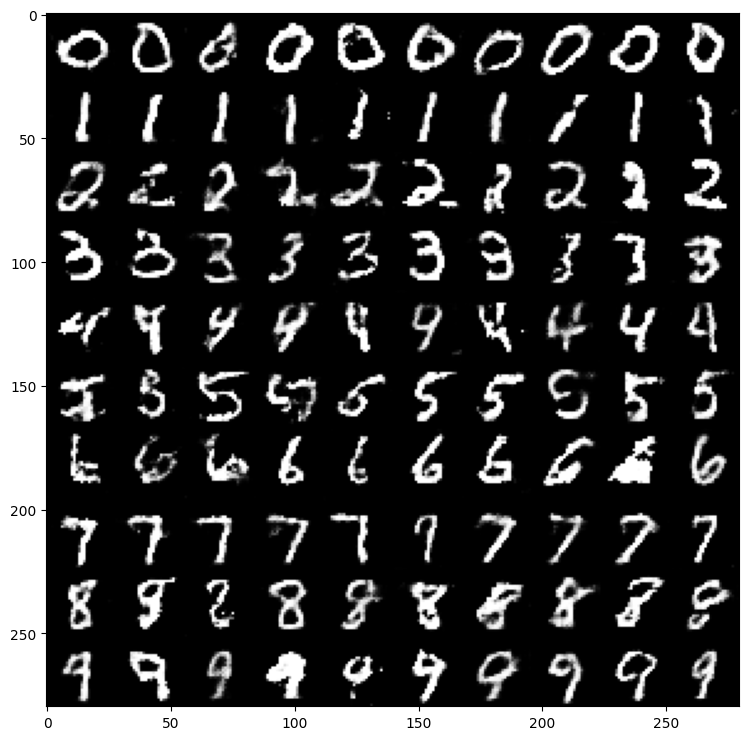

In [10]:

run(
  MODEL_NAME = MODEL_NAME,
  lrs = lr,
  batch_size = batch_size,
  n_critic = n_critic,
  max_epoch = max_epoch, 
  clip_value = clip_value,
  n_noise = n_noise,
  threshold = 0.5,
  beta = 0.025010755222666936)

In [11]:
print(f"{MODEL_NAME} batchnorm False")
plot_f1_precison_recall(f"results/models/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss(f"results/models/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_G_D_loss_scores_per_epoch.csv")
plot_loss_step(f"results/models/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_G_D_loss_scores_per_step.csv")

WGAN batchnorm False


WGAN, batchnorm False


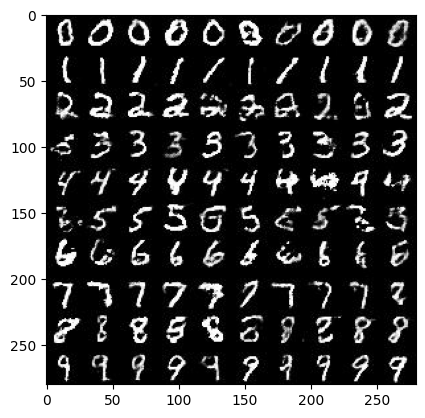

In [12]:
print(f"{MODEL_NAME}, batchnorm False")
path = f"results/imgs/batchnorm_False/{MODEL_NAME}/batchnorm_False/{MODEL_NAME}_last.jpg"
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

# FID SCORE

## VANILLA GAN

In [13]:
MODEL_NAME = "Vanilla_GAN"

path = f"generated_images/batchnorm_False/{MODEL_NAME}/"
add = "batchnorm_False"
path = path + add
model_path = f"results/models/batchnorm_False/{MODEL_NAME}/" + add
# print(model_path)
if os.path.exists(path):
    shutil.rmtree(path)
    # print(f"removed {path}")
os.mkdir(path)
# print(f"created {path}")

for digit in range(0,10):
  digit = str(digit)
  Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    

In [14]:
fid_scores = []
path = f"generated_images/batchnorm_False/{MODEL_NAME}/"
add = "batchnorm_False"
path = path + add
print(path)
real_images_path = "real_images"
generated_images_path = path
batch_size = 20
fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
print(f"FID score: {fid}")
fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["batchnorm_False"] = 1
fid_df.to_csv(f"results/models/batchnorm_False/{MODEL_NAME}_FID_scores_vs_beta.csv")
fid_df

generated_images/batchnorm_False/Vanilla_GAN/batchnorm_False


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 198MB/s] 


FID score: 83.73695530161444


,fid_score,model_name,batchnorm_False
0,83.736955,Vanilla_GAN,1


## LSGAN

In [15]:
MODEL_NAME = "LSGAN"
path = f"generated_images/batchnorm_False/{MODEL_NAME}/"
add = "batchnorm_False"
path = path + add
model_path = f"results/models/batchnorm_False/{MODEL_NAME}/" + add
# print(model_path)
if os.path.exists(path):
    shutil.rmtree(path)
    # print(f"removed {path}")
os.mkdir(path)
# print(f"created {path}")

for digit in range(0,10):
  digit = str(digit)
  Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    
    

In [16]:
fid_scores = []
path = f"generated_images/batchnorm_False/{MODEL_NAME}/"
add = "batchnorm_False"
path = path + add
print(path)
real_images_path = "real_images"
generated_images_path = path
batch_size = 20
fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
print(f"FID score: {fid}")
fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["batchnorm_False"] = 1
fid_df.to_csv(f"results/models/batchnorm_False/{MODEL_NAME}_FID_scores_vs_beta.csv")
fid_df

generated_images/batchnorm_False/LSGAN/batchnorm_False


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.



FID score: 80.13598548737397


,fid_score,model_name,batchnorm_False
0,80.135985,LSGAN,1


## WGAN

In [17]:
MODEL_NAME = "WGAN"
path = f"generated_images/batchnorm_False/{MODEL_NAME}/"
add = "batchnorm_False"
path = path + add
model_path = f"results/models/batchnorm_False/{MODEL_NAME}/" + add
# print(model_path)
if os.path.exists(path):
    shutil.rmtree(path)
    # print(f"removed {path}")
os.mkdir(path)
# print(f"created {path}")

for digit in range(0,10):
  digit = str(digit)
  Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    
    

In [18]:
fid_scores = []
path = f"generated_images/batchnorm_False/{MODEL_NAME}/"
add = "batchnorm_False"
path = path + add
print(path)
real_images_path = "real_images"
generated_images_path = path
batch_size = 20
fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
print(f"FID score: {fid}")
fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["batchnorm_False"] = 1
fid_df.to_csv(f"results/models/batchnorm_False/{MODEL_NAME}_FID_scores_vs_beta.csv")
fid_df

generated_images/batchnorm_False/WGAN/batchnorm_False


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.



FID score: 89.01321103366826


,fid_score,model_name,batchnorm_False
0,89.013211,WGAN,1


## WGAN GP

In [19]:
MODEL_NAME = "WGAN_GP"
path = f"generated_images/batchnorm_False/{MODEL_NAME}/"
add = "batchnorm_False"
path = path + add
model_path = f"results/models/batchnorm_False/{MODEL_NAME}/" + add
# print(model_path)
if os.path.exists(path):
    shutil.rmtree(path)
    # print(f"removed {path}")
os.mkdir(path)
# print(f"created {path}")

for digit in range(0,10):
  digit = str(digit)
  Generate_images_for_FID(digit = digit, model_path = model_path, num_images = 100, save_path = path)

    

In [20]:
fid_scores = []
path = f"generated_images/batchnorm_False/{MODEL_NAME}/"
add = "batchnorm_False"
path = path + add
print(path)
real_images_path = "real_images"
generated_images_path = path
batch_size = 20
fid = calculate_fid_score(real_images_path, generated_images_path, batch_size)
print(f"FID score: {fid}")
fid_scores.append(fid)
  

fid_df = pd.DataFrame()
fid_df["fid_score"] = fid_scores
fid_df["model_name"] = MODEL_NAME
fid_df["batchnorm_False"] = 1
fid_df.to_csv(f"results/models/batchnorm_False/{MODEL_NAME}_FID_scores_vs_beta.csv")
fid_df

generated_images/batchnorm_False/WGAN_GP/batchnorm_False


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.



FID score: 69.06279938446187


,fid_score,model_name,batchnorm_False
0,69.062799,WGAN_GP,1


# Bachnorm False VS Loss

In [21]:
# # load model
def load_model(path, n_noise):

  D = Discriminator().to(DEVICE)
  G = Generator(n_noise).to(DEVICE)
#   D_opt = torch.optim.Adam(D.parameters(), lr=learning_rate, betas=(0., 0.9)) ## may change
#   G_opt = torch.optim.Adam(G.parameters(), lr=learning_rate, betas=(0., 0.9)) ## may change


  checkpoint = torch.load(f"{path}/model.tar")

  G.load_state_dict(checkpoint['G_state_dict'])
  D.load_state_dict(checkpoint['D_state_dict'])

  # D_opt.load_state_dict(checkpoint['g_optimizer_state_dict'])
  # D_opt.load_state_dict(checkpoint['d_optimizer_state_dict'])
  # eval(G)

  

  D_loss = checkpoint['D_loss']
  G_loss = checkpoint['G_loss']
  return G_loss, D_loss
beta

0.9

In [22]:
def load_model_and_results(MODEL_NAME):
  trained_bns = os.listdir(f"results/models/batchnorm_False/{MODEL_NAME}/")
  root = f"results/models/batchnorm_False/{MODEL_NAME}/batchnorm_False/"
  G_loss_list = []
  D_loss_list = []



  print(f"Batchnorm False")
  path = root 

  G_loss, D_loss = load_model(path, n_noise)
  G_loss_list.append(G_loss.item())
  D_loss_list.append(D_loss.item())

  print("D = ",D_loss.item(), "G = ",G_loss.item())

  result_loss = pd.DataFrame()
  result_loss["D_loss"] = D_loss_list
  result_loss["G_loss"] = G_loss_list
  result_loss["batchnorm_False"] = 1
  result_loss["batchnorm_False"] = result_loss["batchnorm_False"].astype('str')
  result_loss['size'] = 5
  result_loss.to_csv(f"results/models/batchnorm_False/{MODEL_NAME}_loss_values.csv")
  print(result_loss)


  fig = make_subplots(rows=1, cols=2)

  fig.add_trace(px.scatter(result_loss, x="batchnorm_False", y="D_loss",  size="size").data[0], row=1, col=1)
  fig.add_trace(px.scatter(result_loss, x="batchnorm_False", y="G_loss",  size="size").data[0], row=1, col=2)
  fig.update_layout(title="Loss vs Batchnorm False", 
                    xaxis=dict(title="BatchNorm"),
                    yaxis=dict(title="Loss"))

  fig.show()

  result_time = pd.read_csv(f"results/models/batchnorm_False/{MODEL_NAME}_runing_times.csv")
  result_time["size"] = 5
  
  print(result_time)

  fig = px.scatter(result_time, x="batchnorm_False", y="time", color="batchnorm_False", size="size", title = "run time vs Batchnorm False")
  fig.show()  

### Vanilla GAN

In [23]:
load_model_and_results("Vanilla_GAN")

Batchnorm False
D =  1.3744999170303345 G =  0.6588554382324219
   D_loss    G_loss batchnorm_False  size
0  1.3745  0.658855               1     5


   Unnamed: 0         time  batchnorm_False  size
0           0  1219.510687                1     5


### LSGAN

In [24]:
load_model_and_results("LSGAN")

Batchnorm False
D =  0.15778213739395142 G =  0.3789154291152954
     D_loss    G_loss batchnorm_False  size
0  0.157782  0.378915               1     5


   Unnamed: 0         time  batchnorm_False  size
0           0  1411.852638                1     5


### WGAN


In [25]:
load_model_and_results("WGAN")


Batchnorm False
D =  0.0001742839813232422 G =  2.516084671020508
     D_loss    G_loss batchnorm_False  size
0  0.000174  2.516085               1     5


   Unnamed: 0         time  batchnorm_False  size
0           0  2418.304097                1     5


### WGAN_GP


In [26]:
load_model_and_results("WGAN_GP")


Batchnorm False
D =  -0.014601163566112518 G =  12.457170486450195
     D_loss    G_loss batchnorm_False  size
0 -0.014601  12.45717               1     5


   Unnamed: 0         time  batchnorm_False  size
0           0  3111.341992                1     5
